In [1]:
import csv
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
import pylab as pb
import seaborn as sns
from scipy import stats

%matplotlib inline

# New Scatter Plots from unrestricted data

** This notebook contains the code to generate scatterplots from job (firm-worker pair) level, grouped in bins and averaged to sort of the amount of noise in previous scatterplots.**

This notebook uses the file *PD05_wage.csv* as source.Ir contains all the pairs worker-job for which there exists profits and size information.

In [2]:
# Opening data
with open('PD05_wage.csv', 'rb') as f:
    reader = csv.reader(f)
    data05 = list(reader)

In [3]:
# Passing data to lists, then to arrays (should change this to make it all in one) 
firmID05 = []
size05 = []
wage05 = []
profit05 = []
skill_w05 = []
firm_age05 = []
industry_code05 = []
region05 = []
for row in data05[1:]:
    firmID05.append(row[0])
    size05.append(int(row[1]))
    wage05.append(float(row[2]))
    profit05.append(float(row[3]))
    skill_w05.append(float(row[4]))
    if row[5]== '':
        firm_age05.append(0)
    else:
        firm_age05.append(float(row[5]))
    if row[6]== '':
        industry_code05.append(0)
    else:
        industry_code05.append(int(row[6]))
    region05.append(int(row[7]))
# Firm unique code (string)
firmID05 = np.asarray(firmID05)
# Firm size in workers (int)
size05 = np.asarray(size05)
# Daily average wage for each firm, in euros (float)
wage05 = np.asarray(wage05)
# Declared average profits for each firm per year, in euros (float)
profit05 = np.asarray(profit05)
# Average education level of workers per firm, from 0 to 6 (float)
skill_w05 = np.asarray(skill_w05)
# Firm age in years (float) Missing observations have a 0.
firm_age05 = np.asarray(firm_age05)
# Industry codes (int) Missing observations have a 0.
industry_code05 = np.asarray(industry_code05)
# Regional code (int)
region05 = np.asarray(region05)

print "Sample size: "+str(len(firmID05))

Sample size: 73544


## Part I: New scatterplots

The idea is to group wages/size/profits in bins, and then calculate the average of those bins. Being then the average of an average, weexpect the noise from previous plots to be significantly reduced.

In [4]:
# Getting bins with equal numebr of people, but sorted - and corresponding sizes
import collections
both = dict(zip(wage05, size05))
od = collections.OrderedDict(sorted(both.items()))

wage_bins = np.arange(0,73500,100)
size_data = []
wage_data = []
for i in range(1,len(wage_bins)):
    wage_data.append(np.mean(od.keys()[wage_bins[i-1]:wage_bins[i]]))
    size_data.append(np.mean(od.values()[wage_bins[i-1]:wage_bins[i]]))

C:\Anaconda\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


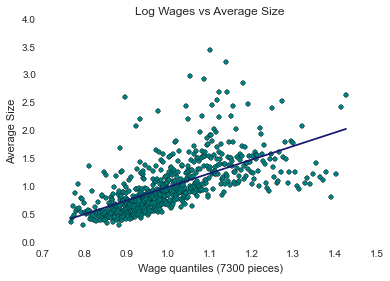

Slope: 2.44573954542


In [6]:
# Plotting
lognorm_wage = np.log(wage_data[30:-30])/np.mean(np.log(wage_data[30:-30]))
normed_size = size_data[30:-30]/np.mean(size_data[30:-30])

plt.scatter(lognorm_wage, normed_size,c="teal")
plt.scatter(lognorm_wage, normed_size,c="teal", alpha=0.5)

m, b = np.polyfit(lognorm_wage, normed_size, 1)
plt.plot(lognorm_wage, m*lognorm_wage + b, '-', c='midnightblue')

plt.xlabel("Wage quantiles (7300 pieces)")
plt.title("Log Wages vs Average Size")
plt.ylabel("Average Size")
#plt.ylim(0,600)
#plt.xlim(0,8)
plt.show()
print "Slope:", m

In [7]:
# Getting bins with equal numebr of people, but sorted - and corresponding profit
wageprof = dict(zip(wage05, profit05))
wageprof_s = collections.OrderedDict(sorted(wageprof.items()))

wage_bins = np.arange(0,73500,100)
profit_data = []
for i in range(1,len(wage_bins)):
    profit_data.append(np.mean(wageprof_s.values()[wage_bins[i-1]:wage_bins[i]]))

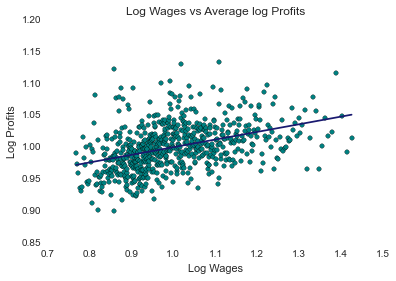

Slope: 0.119667496478


In [9]:
# Plotting
lognorm_profit = np.log(profit_data[30:-30])/np.mean(np.log(profit_data[30:-30]))

plt.scatter(lognorm_wage, lognorm_profit,c="teal")

m, b = np.polyfit(lognorm_wage, lognorm_profit, 1)
plt.plot(lognorm_wage, m*lognorm_wage + b, '-', c='midnightblue')

plt.title("Log Wages vs Average log Profits")
plt.xlabel("Log Wages")
plt.ylabel("Log Profits")
#plt.ylim(0,12)
#plt.xlim(0,8)
plt.show()
print "Slope:", m

Recording the data - no outliers, top and bottom 30 bins (600 obs, 8% of total) trimmed

In [16]:
wage_data_short = wage_data[30:-30]
with open('data05_normed.csv', 'wb') as fp:
    writer = csv.writer(fp, delimiter=',')
    data = [['size','wage','profit','log_wage']]
    for i in range(len(normed_size)):
        row = [str(normed_size[i]),str((wage_data_short[i]/np.mean(wage_data_short))),str(lognorm_profit[i]), str(lognorm_wage[i])]
        data.append(row)
    writer.writerows(data)

## Part II: Sample of old-style scatterplots

Old scatterplots just plot the data points from raw data. Given the big size of the sample (73,544 observations), and some noisy observations, the resulting scatter plots are terrible. Take a look...

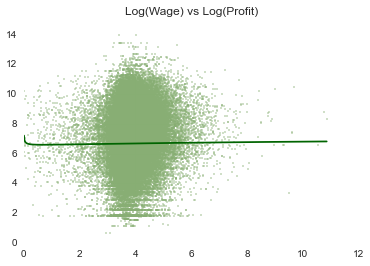

Slope(s):0.0230270333102  0.0287481066632


In [59]:
# Wage vs Log(Profit)
wage_range = np.linspace(min(np.log(wage05)), max(np.log(wage05)), 1000)
plt.scatter(np.log(wage05), np.log(profit05), color='sage', s=1.0)
n, m, b = np.polyfit(np.log(wage05), np.log(profit05), 2)
plt.plot(wage_range, n*np.log(wage_range)**2 + m*np.log(wage_range) + b, '-', c='darkgreen')
plt.ylim(0,15)
plt.xlim(0,12)
plt.title('Log(Wage) vs Log(Profit)')
plt.show()
print 'Slope(s):'+str(m)+"  "+str(n)

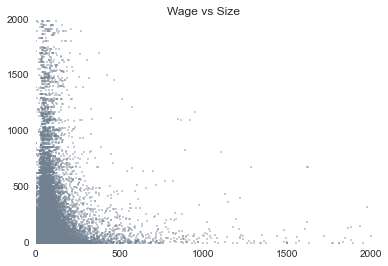

Slope(s): 0.132704582824 -1.02362489931e-05 1.5366822749e-10


In [80]:
# Wage vs Log(Profit)
wage_range = np.linspace(min(wage05), max(wage05), 1000)
plt.scatter(wage05, size05, color='slategrey', s=1.0)
n3, n, m, b = np.polyfit(wage05, size05 ,3)
#plt.plot(wage_range, n3*wage_range**3 + n*wage_range**2 + wage_range*m + b, '-', c='black')
plt.ylim(0,2000)
plt.xlim(0,2000)
plt.title('Wage vs Size')
plt.show()
print 'Slope(s):', m, n, n3

##Appendix

** More plots! - uneven bins**

Which means that there are differnet number of people in each bin - but all of them are eaqually spaced in terms of wages/profits/size.

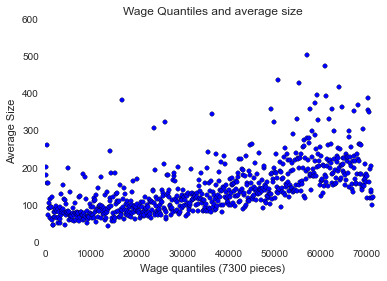

In [158]:
plt.scatter(wage_bins[1:], size_data)
plt.xlim(0,73000)
plt.title("Wage Quantiles and average size")
plt.xlabel("Wage quantiles (7300 pieces)")
plt.ylabel("Average Size")
plt.show()

In [105]:
wage_bins = np.arange(0,73500,100)
wage_data = []
bin_size = []
for i in range(1, len(wage_bins)):
    bufferr = []
    for j in range(len(wage05)):
        if wage05[j]<wage_bins[i] and wage05[j]>= wage_bins[i-1]:
            bufferr.append(size05[j])
    wage_data.append(np.mean(bufferr))
    bin_size.append(len(bufferr))

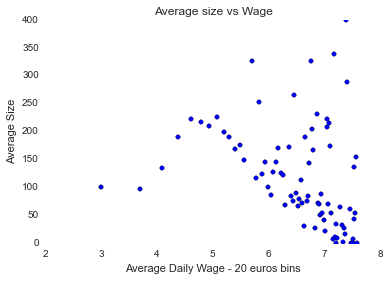

In [65]:
plt.scatter(wage_bins[1:], wage_data)
plt.ylabel("Average Size")
plt.xlabel("Average Daily Wage - 20 euros bins")
#plt.xlim(0,15)
plt.ylim(0,400)
plt.title("Average size vs Wage")

m, b = np.polyfit(np.log(wage_bins[1:]), wage_data, 1)
plt.plot(np.log(wage_bins[1:]), m*np.log(wage_bins[1:]) + b, '-', c='darkgreen')

plt.show()

In [140]:
size_bins = np.arange(0,500,10)
size_data = []
for i in range(1, len(size_bins)):
    bufferr = []
    for j in range(len(size05)):
        if size05[j]<size_bins[i] and size05[j]>= size_bins[i-1]:
            bufferr.append(wage05[j])
    size_data.append(np.mean(bufferr))

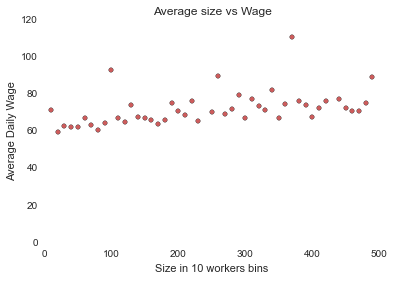

In [150]:
plt.scatter(size_bins[1:], size_data, c="indianred")
plt.xlabel("Size in 10 workers bins")
plt.ylabel("Average Daily Wage")
plt.xlim(0,500)
plt.ylim(0,120)
plt.title("Average size vs Wage")
plt.show()

In [43]:
p_bins = np.linspace(0,14,100)
size_data = []
for i in range(1, len(p_bins)):
    bufferr = []
    for j in range(len(profit05)):
        if np.log(profit05[j])<p_bins[i] and np.log(profit05[j])>= p_bins[i-1]:
            bufferr.append(size05[j])
    size_data.append(np.mean(bufferr))

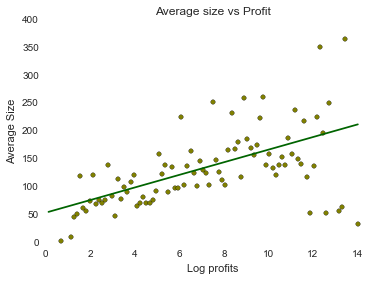

In [54]:
plt.scatter(p_bins[1:], size_data, c="olive")

m, b = np.polyfit(p_bins[8:-9], size_data[7:-9], 1)
plt.plot(p_bins[1:], m*p_bins[1:] + b, '-', c='darkgreen')

plt.xlabel("Log profits")
plt.ylabel("Average Size")
plt.xlim(0,15)
plt.ylim(0,400)
plt.title("Average size vs Profit")
plt.show()

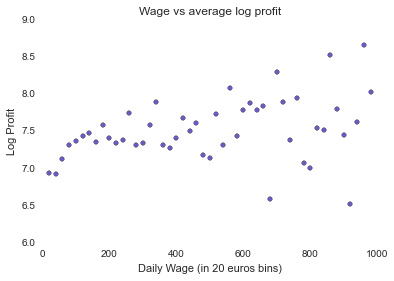

In [138]:
wage_bins = np.arange(0,1000,20)
wage_data = []
for i in range(1, len(wage_bins)):
    bufferr = []
    for j in range(len(wage05)):
        if wage05[j]<wage_bins[i] and wage05[j]>= wage_bins[i-1]:
            bufferr.append(np.log(profit05[j]))
    wage_data.append(np.mean(bufferr))
    
plt.scatter(wage_bins[1:], wage_data, c='slateblue')
plt.ylabel("Log Profit")
plt.xlabel("Daily Wage (in 20 euros bins)")
plt.xlim(0,1000)
plt.title("Wage vs average log profit")
plt.show()

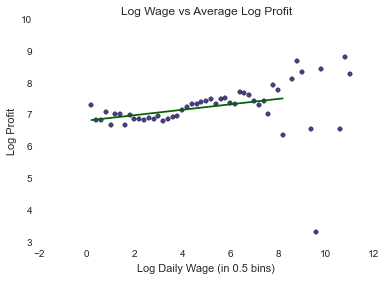

In [35]:
wage_bins = np.arange(0,12,0.2)
wage_data = []
for i in range(1, len(wage_bins)):
    bufferr = []
    for j in range(len(wage05)):
        if np.log(wage05[j])<wage_bins[i] and np.log(wage05[j])>= wage_bins[i-1]:
            bufferr.append(np.log(profit05[j]))
    wage_data.append(np.mean(bufferr))
    
m, b = np.polyfit(wage_bins[1:-18], wage_data[:-18], 1)
plt.plot(wage_bins[1:-18], m*wage_bins[1:-18] + b, '-', c='darkgreen')
    
plt.scatter(wage_bins[1:], wage_data, c='darkslateblue')
plt.ylabel("Log Profit")
plt.xlabel("Log Daily Wage (in 0.5 bins)")
plt.title("Log Wage vs Average Log Profit")
plt.show()

In [42]:
max(np.log(profit05))

13.956388399231738